## `Banknote Authentication` - Clustering using ML Algorithms


### Problem Statement
The objective of this project is to classify the banknotes as authentic or fake based on the given features. The dataset contains 5 columns, namely `variance`, `skewness`, `curtosis`, `entropy`, and `class`. The class column is the target variable and it has two classes, 0 and 1. 

The dataset is available at the following link: https://archive.ics.uci.edu/dataset/267/banknote+authentication

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import git 

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid")
sns.set_palette("colorblind")

In [3]:
repoPath = git.Repo('.', search_parent_directories=True).working_tree_dir
dataPath = repoPath + '/data/BanknoteAuthentication.csv'

### 1. Exploratory Data Analysis (EDA)

Load the data

In [4]:
# no column names in the csv file, so we will need to add them
columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# read the data
df = pd.read_csv(dataPath, names=columns)

Missing Values?

In [5]:
# look for missing values
#df.isnull().sum() # no missing values

Duplicate Values?

In [6]:
# look for duplicates
df.duplicated().sum()  # 24 duplicates

# drop duplicates
df.drop_duplicates(inplace=True)

Summary Statistics

In [7]:
df[['Variance', 'Skewness', 'Curtosis', 'Entropy']].describe()

,Variance,Skewness,Curtosis,Entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


Principal Component Analysis (PCA) for visualization

We will use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Each data point will be colored according to its class.

In [8]:
pca = PCA(n_components=2)
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
X = StandardScaler().fit_transform(X)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [9]:
# concatenate the class column
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

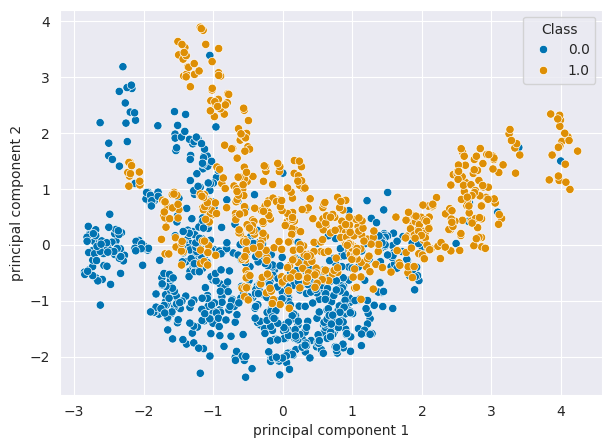

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Class', data=finalDf)
plt.show()

There are quite some overlapping points in the data. 

### 2. Data Preprocessing

Standardize the data

In [11]:
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']].values
y = df['Class'].values

# standardize the data
X = StandardScaler().fit_transform(X)

Train-Test Split

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1078, 4), (270, 4))

### 3. Clustering using ML Algorithms

We will use the following clustering algorithms to cluster the data:

    - KMeans
    - Agglomerative Clustering
    - DBSCAN
    - Mean Shift
    - Gaussian Mixture Model
    - Spectral Clustering


In [21]:
def cluster_the_data(model, X_train, X_test, n_clusters):
    """
    Function to cluster the data
    """
    models = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        'DBSCAN': DBSCAN(eps=1, min_samples=5),
        'MeanShift': MeanShift(),
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
        'Spectral': SpectralClustering(n_clusters=n_clusters),
        'GaussianMixture': GaussianMixture(n_components=n_clusters)
    }

    model = models[model]
    model.fit(X_train)
    
    predict_method = ['KMeans', 'GaussianMixture']

    if model in predict_method:
        y_pred = model.predict(X_test)
    else:
        y_pred = model.fit_predict(X_test)
    return y_pred

### 3.1 KMeans

We will use the `KMeans` algorithm to cluster the data. We will use the `elbow` method to find the optimal number of clusters.

In [14]:
# KMeans
y_pred = cluster_the_data('KMeans', X_train, X_test, 2)

# score
kmeans_score = accuracy_score(y_test, y_pred)
kmeans_score

0.35555555555555557

### 3.2 Agglomerative Clustering

We will use the `Agglomerative Clustering` algorithm to cluster the data. We will use the `dendrogram` to find the optimal number of clusters.

In [24]:
# Agglomerative Clustering
y_pred = cluster_the_data('Agglomerative', X_train, X_test, 2)

agg_score = accuracy_score(y_test, y_pred)
agg_score

0.6481481481481481

### 3.3 DBSCAN

We will use the `DBSCAN` algorithm to cluster the data. We will use the `epsilon` and `min_samples` parameters to find the optimal number of clusters.

In [22]:
# DBSCAN
y_pred = cluster_the_data('DBSCAN', X_train, X_test, 2)

dbscan_score = accuracy_score(y_test, y_pred)
dbscan_score

0.5444444444444444

### 3.4 Mean Shift

We will use the `Mean Shift` algorithm to cluster the data. We will use the `bandwidth` parameter to find the optimal number of clusters.

In [26]:
# MeanShift
y_pred = cluster_the_data('MeanShift', X_train, X_test, 2)

# convert -1 to 1
y_pred = np.where(y_pred == -1, 1, 0)

meanshift_score = accuracy_score(y_test, y_pred)
meanshift_score

0.5444444444444444

### 3.5 Gaussian Mixture Model

We will use the `Gaussian Mixture Model` algorithm to cluster the data. We will use the `bic` parameter to find the optimal number of clusters.

In [27]:
# Gaussian Mixture Model (GMM)
y_pred = cluster_the_data('GaussianMixture', X_train, X_test, 2)

gmm_score = accuracy_score(y_test, y_pred)
gmm_score

0.4888888888888889

### 3.6 Spectral Clustering

We will use the `Spectral Clustering` algorithm to cluster the data. We will use the `n_clusters` parameter to find the optimal number of clusters.

In [29]:
# Spectral Clustering
y_pred = cluster_the_data('Spectral', X_train, X_test, 2)

spectral_score = accuracy_score(y_test, y_pred)
spectral_score

0.6777777777777778

### 4. Discussion

Clustering is a type of unsupervised learning, i.e., there is no target variable. The goal is to group similar data points together and discover underlying patterns in the data. 

However, in this project, we have the target variable, i.e., the class column. We uses the target variable to evaluate the performance of the clustering algorithms, like a supervised learning classification problem.